# Planck cluster counts

In [1]:
import numpy as np
from classy_sz import Class as Class_sz

## Binned calculation

Get accurate binned cluster calculations in less than a second!

In [29]:
%%time
class_sz = Class_sz()


class_sz.set({

'output' : 'sz_cluster_counts',
'mass_function' :  'T08M500c',
'has_selection_function' : 1,
'experiment' : 0,
'y_m_relation' : 0,
'use_skyaveraged_noise': 0,
'use_planck_binned_proba' : 0,


'm_pivot_ym_[Msun]': 3e14,    

'M_min' : 1e13*0.7, 
'M_max' : 1e16*0.7,

'z_min' : 0.01,
'z_max' : 1.02,

'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 70.,
'tau_reio': 0.0561,
'ln10^{10}A_s': 2.9799585,
'n_s': 0.96,



'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 1.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr': 0.25, # fiducial 0.25
'log10_snr_min' : 0.7, # fiducial 0.7

#the paramater dlny is crucial, it controls the speed of the calculation
#important to check that lnymin and lnymax are broad enough
'dlny' : 0.07, # fiducial 0.05
'lnymin' : -11, # fiducial -11
'lnymax' : 1., # fiducial 1.
'sigmaM_ym' :0.173, # fiducial 0.173


'dlnM_cluster_count_completeness_grid' : 0.05, # 0.01 fiducial


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,





'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6.,


# X ray mass bias (if applicable)
'B' : 1.25,

'ndim_redshifts' : 100,

'szcc_dof': 0.,
'cosmo_model': 1,

})
class_sz.compute_class_szfast()

CPU times: user 10.3 s, sys: 3.3 s, total: 13.6 s
Wall time: 2.07 s


In [22]:
dNdzdy_theoretical = class_sz.dndzdy_theoretical()['dndzdy']
z_center = class_sz.dndzdy_theoretical()['z_center']
z_edges = class_sz.dndzdy_theoretical()['z_edges']
log10y_center = class_sz.dndzdy_theoretical()['log10y_center']
log10y_edges = class_sz.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []

for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
print('Ntot %.10e'%(np.sum(N_clusters_z_theory)))

Ntot 5.1269644816e+02


In [23]:
class_sz.sigma8()

0.787079475530407

Text(0, 0.5, 'counts')

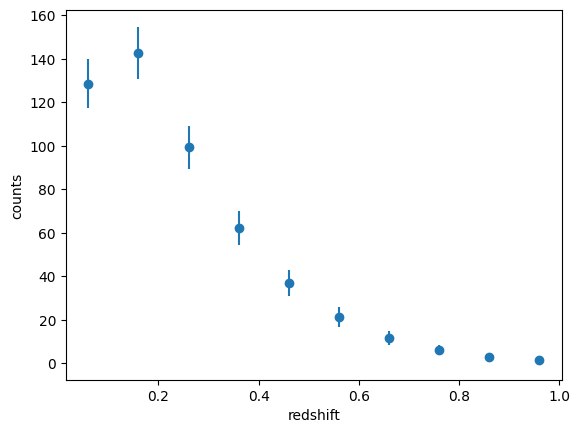

In [24]:
import matplotlib.pyplot as plt
plt.errorbar(z_center,N_clusters_z_theory,yerr = np.sqrt(N_clusters_z_theory),ls='None',marker='o')
plt.xlabel('redshift')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

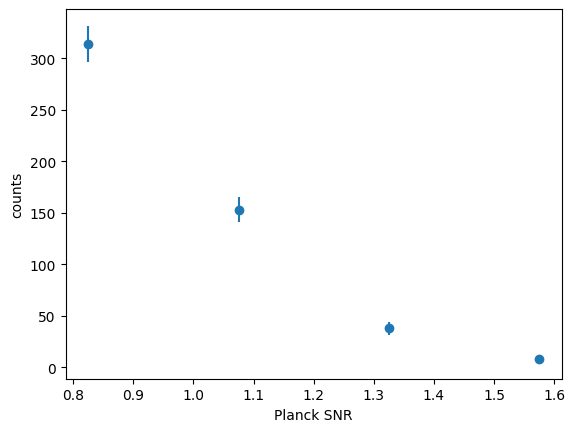

In [28]:
import matplotlib.pyplot as plt
plt.errorbar(log10y_center,N_clusters_y_theory,yerr = np.sqrt(N_clusters_y_theory),ls='None',marker='o')
plt.xlabel('Planck SNR')
plt.ylabel('counts')

## Unbinned calculation

See [Zubeldia & Bolliet (2024)](https://inspirehep.net/literature/2768906).

The class_sz unbinned implementation loops over $z$ and computes in each noise patch in parallel. This is sub-optimal.
Given the fact that `cosmocnc` superseeds `class\_sz` on these calculations, we advise you switch to `cosmocnc` if your work requires 
heavy cluster cosmology calculation. `class_sz` unbinned cluster calculation can always be used for exploration. 

In [45]:
%%time
class_sz = Class_sz()
class_sz.set({

'output' : 'sz_cluster_counts_fft',
'mass_function' :  'T08M500c',
'has_selection_function' : 1,
'experiment' : 0,
'y_m_relation' : 0,
'use_skyaveraged_noise': 0,
'use_planck_binned_proba' : 0,


'm_pivot_ym_[Msun]': 3e14,    

'M_min' : 1e13*0.7, 
'M_max' : 1e16*0.7,

'z_min' : 0.01,
'z_max' : 1.02,

'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 70.,
'tau_reio': 0.0561,
'ln10^{10}A_s': 2.9799585,
'n_s': 0.96,



'sigmaM_ym' :0.173, # fiducial 0.173


'szcc_dof': 0.0,
'szcc_qtrunc': -1.0,
'szcounts_fft_nz': 550,
'szcounts_fft_z_max': 1.01,
'szcounts_fft_z_min': 0.01,
'szcounts_qmax_fft_padded': 500.0,
'N_samp_fftw': 8192,


'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6.,


# X ray based hydrostatic mass mass bias (if applicable)
'B' : 1.25,
'cosmo_model': 1,

})
class_sz.compute_class_szfast()


CPU times: user 24min 26s, sys: 27.2 s, total: 24min 53s
Wall time: 3min 52s


In [46]:
zmin = class_sz.pars['szcounts_fft_z_min']
zmax = class_sz.pars['szcounts_fft_z_max']
nz = class_sz.pars['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 6.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)

get_dndzdq = np.vectorize(class_sz.get_szcounts_dndzdq_at_z_q)

In [47]:
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)

Nq = []
Nq = np.asarray(Nq)

In [48]:
Ntot = np.trapz(Nz,x=z_arr)
Ntot

514.1981625268976

In [49]:
class_sz.sigma8()

0.787079475530407

In [50]:
z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

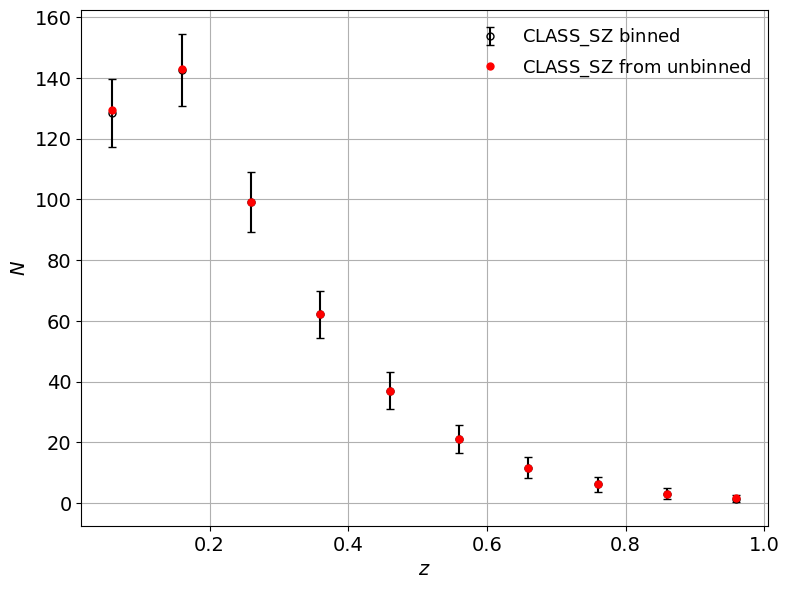

In [51]:
plt.figure(figsize=(8,6))


plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=3,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')



plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
# plt.loglog()
plt.show()

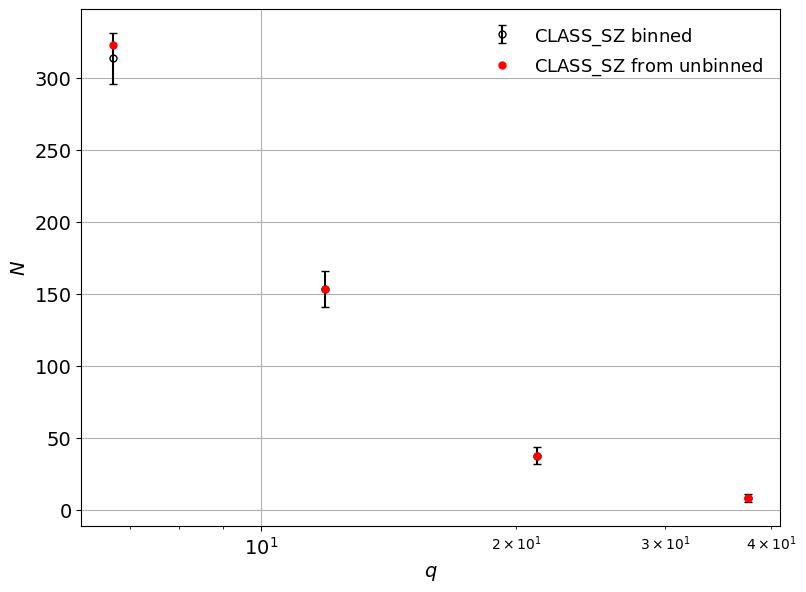

In [52]:
plt.figure(figsize=(8,6))

plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=3,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')



plt.xlabel('$q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()